In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [168]:
dfbook = pd.read_csv('AmazonBooks.csv')

In [12]:
dfRanking = pd.read_csv('BookRanking.csv')

In [169]:
dfbook.head()

,Title,Price,Star,Rating,Genre,Category,Publisher,Badge,Url
0,Why Black Lives Matter: African American Thriv...,$28.00,Empty,Empty,Empty,NaN,NaN,Empty,NaN
1,Joy The Baker,$12.99,Empty,Empty,Empty,NaN,NaN,Empty,NaN
2,Soulmates,$9.00,Empty,Empty,Empty,NaN,NaN,Empty,NaN
3,NYT Explorer. 100 Trips Around the World,$36.00,Empty,Empty,Empty,NaN,NaN,Empty,NaN
4,Face to Face: The Photographs of Camilla McGrath,$54.41,Empty,Empty,Empty,NaN,NaN,Empty,NaN


In [170]:
dfbook.shape

(1201, 9)

In [171]:
dfbook.columns

Index(['Title', 'Price', 'Star', 'Rating', 'Genre', 'Category', 'Publisher',
       'Badge', 'Url'],
      dtype='object')

In [172]:
boolean_condition = dfbook.Badge == "Empty"
column_name = "Badge"
new_value = "NotBestSeller"

dfbook.loc[boolean_condition, column_name] = new_value

In [173]:
boolean_condition = dfbook.Badge == "Holiday Gift Guide"
column_name = "Badge"
new_value = "NotBestSeller"

dfbook.loc[boolean_condition, column_name] = new_value

In [174]:
boolean_condition = dfbook.Badge == "Kids Gift Guide"
column_name = "Badge"
new_value = "NotBestSeller"

dfbook.loc[boolean_condition, column_name] = new_value

In [175]:
# Plot this and explain that why only Amazon Charts 8
dfbook["Badge"].value_counts()

NotBestSeller    1050
Best Seller       142
Amazon Charts       8
Name: Badge, dtype: int64

In [176]:
# Write code chunk to create category column
#dfbook.Genre.head()

In [177]:
#Insert new Field Category Using Genre **********************************

dfbook['Category'].value_counts()

Food                   31
Children               24
Fantasy                22
Thriller & Suspense    19
Reference              16
Biography              13
Travel & Places         7
Politics                7
Science                 2
Thr                     1
Thrillers               1
Name: Category, dtype: int64

In [178]:
dfbook['Category'].unique()

array([nan, 'Science', 'Food', 'Travel & Places', 'Children', 'Reference',
       'Fantasy', 'Politics', 'Biography', 'Thriller & Suspense', 'Thr',
       'Thrillers'], dtype=object)

In [179]:
# Total missing values in each column
total1 = dfbook.isnull().sum().sort_values(ascending=False)
total1

Url          1201
Publisher    1201
Category     1058
Badge           1
Genre           1
Rating          1
Star            1
Price           1
Title           1
dtype: int64

In [180]:
len(dfbook['Star'])

1201

In [181]:
# drop rows where Star and Rating has value = "Empty"
dfbook = dfbook.drop(dfbook[dfbook['Star']=="Empty"].index)


In [182]:
dfbook['Star'].head()

138    5.0 out of 5 stars
139    5.0 out of 5 stars
140    5.0 out of 5 stars
141    5.0 out of 5 stars
142    5.0 out of 5 stars
Name: Star, dtype: object

In [183]:
dfbook['Star'] = dfbook['Star'].replace(np.nan, '3.9 out of 5 stars', regex=True)

In [185]:
# Total missing values in each column
total1 = dfbook.isnull().sum().sort_values(ascending=False)
total1

Url          1063
Publisher    1063
Category      921
Badge           1
Genre           1
Rating          1
Price           1
Title           1
Stars           0
Star            0
dtype: int64

In [184]:
# Split Star column to extract Number of Star
dfbook['Stars'] = dfbook['Star'].str.split(' ').str[0]

In [186]:
# drop rows where Star and Rating has value = "Empty"
dfbook = dfbook.drop(dfbook[dfbook['Star']=="Empty"].index)


In [187]:
dfbook['Star'].head()

138    5.0 out of 5 stars
139    5.0 out of 5 stars
140    5.0 out of 5 stars
141    5.0 out of 5 stars
142    5.0 out of 5 stars
Name: Star, dtype: object

In [188]:
dfbook.head()

,Title,Price,Star,Rating,Genre,Category,Publisher,Badge,Url,Stars
138,Dessert Person: Recipes and Guidance for Bakin...,$21.00,5.0 out of 5 stars,152,in Dessert Baking,Food,NaN,NotBestSeller,NaN,5.0
139,How May I Offend You Today?: Rants and Revelat...,$16.99,5.0 out of 5 stars,133,in Religious Humor,NaN,NaN,Best Seller,NaN,5.0
140,Harry Potter and the Sorcerer's Stone: MinaLim...,$23.77,5.0 out of 5 stars,131,in Travel Photography,Travel & Places,NaN,NotBestSeller,NaN,5.0
141,Honest Advent: Awakening to the Wonder of God-...,$17.09,5.0 out of 5 stars,110,Empty,NaN,NaN,NotBestSeller,NaN,5.0
142,Clean Paleo One-Pot Meals: 100 Delicious Recip...,$20.47,5.0 out of 5 stars,107,Empty,NaN,NaN,NotBestSeller,NaN,5.0


In [189]:
dfbook['Stars'].value_counts()

5.0    308
4.8    141
4.9    126
4.7    104
4.6     79
4.5     77
4.4     61
4.3     43
4.1     25
4.2     22
4.0     16
3.9     15
3.8     14
3.5      7
3.7      5
3.6      4
3.0      4
2.0      3
3.2      2
1.0      2
3.4      2
3.3      1
2.8      1
2.5      1
Name: Stars, dtype: int64

In [190]:
dfbook.columns

Index(['Title', 'Price', 'Star', 'Rating', 'Genre', 'Category', 'Publisher',
       'Badge', 'Url', 'Stars'],
      dtype='object')

In [191]:
dfbook["Stars"]= dfbook["Stars"].astype(str).astype(float)


Text(0.5, 0, 'star rating count')

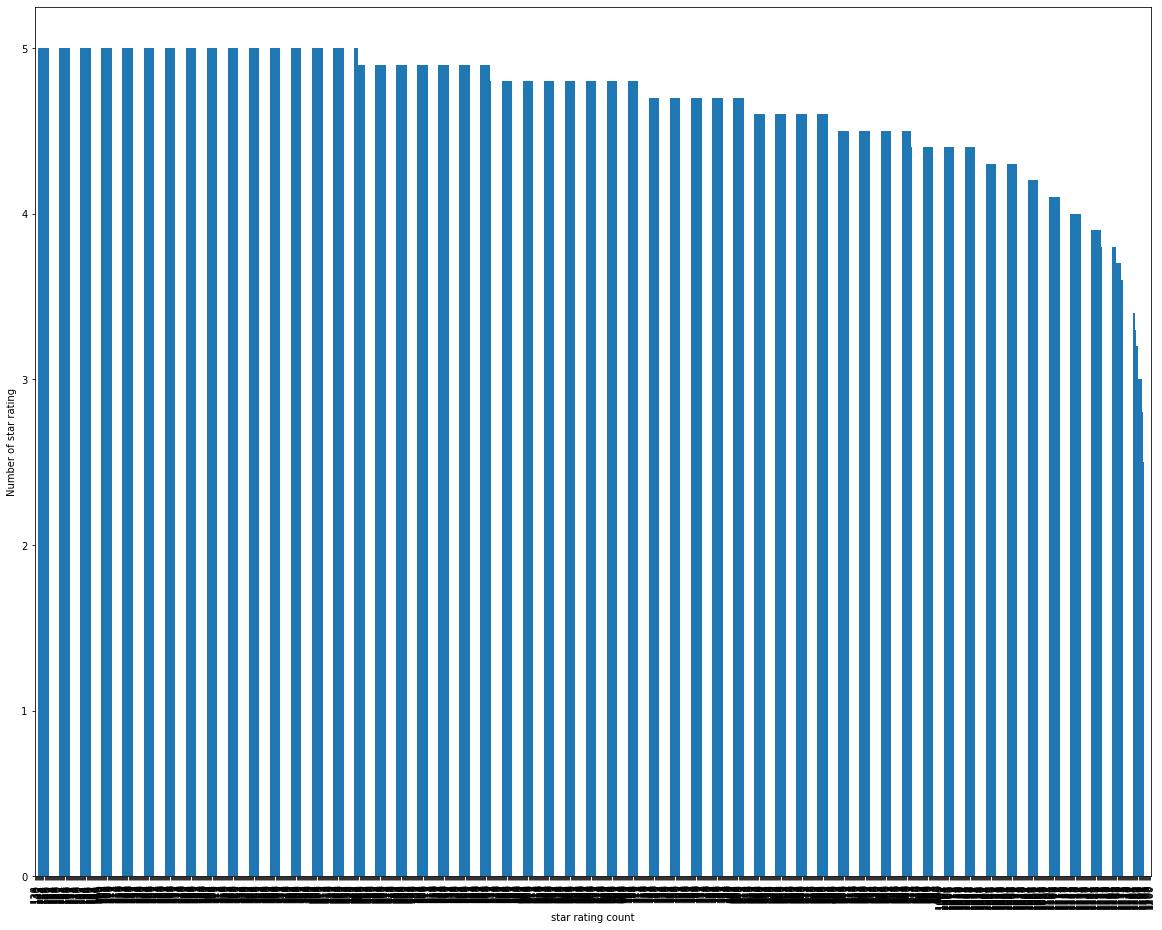

In [192]:
# Barplot
ax = dfbook['Stars'].plot(kind='bar',figsize = (20,16)) 
ax.set_ylabel('Number of star rating')
ax.set_xlabel('star rating count')

In [193]:
bins = [-0.1, 0.9, 1.9, 2.9, 3.9, 4.9, 5.9]
names = ['0', '1', '2', '3', '4', '5']

dfbook["Starbin"] = pd.cut(dfbook['Stars'], bins, labels=names)
print(dfbook.dtypes)

Title          object
Price          object
Star           object
Rating         object
Genre          object
Category       object
Publisher     float64
Badge          object
Url           float64
Stars         float64
Starbin      category
dtype: object


Text(0.5, 0, 'Star Rating')

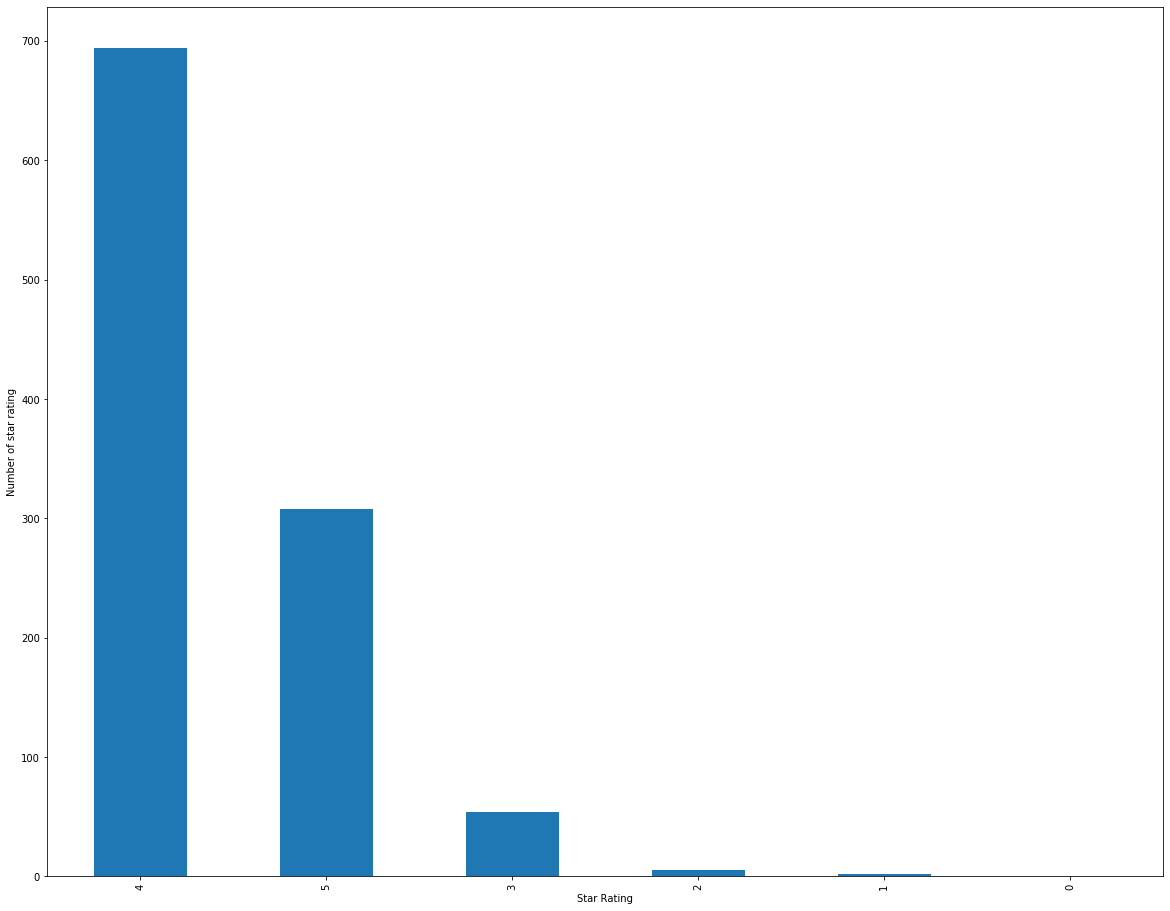

In [195]:
# bar

ax = dfbook['Starbin'].value_counts().plot(kind='bar',figsize = (20,16)) 
ax.set_ylabel('Number of star rating')
ax.set_xlabel('Star Rating')

In [ ]:
# import pandas as pd
# import seaborn as sns

# df = sns.load_dataset("tips")
# x, y, hue = "day", "proportion", "sex"
# hue_order = ["Male", "Female"]

# (df[x]
#  .groupby(df[hue])
#  .value_counts(normalize=True)
#  .rename(y)
#  .reset_index()
#  .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

In [196]:
# dropping URL and Publisher columns 
dfbook.drop(["Url", "Publisher","Star"], axis = 1, inplace = True) 

In [197]:
dfbook.head()

,Title,Price,Rating,Genre,Category,Badge,Stars,Starbin
138,Dessert Person: Recipes and Guidance for Bakin...,$21.00,152,in Dessert Baking,Food,NotBestSeller,5.0,5
139,How May I Offend You Today?: Rants and Revelat...,$16.99,133,in Religious Humor,NaN,Best Seller,5.0,5
140,Harry Potter and the Sorcerer's Stone: MinaLim...,$23.77,131,in Travel Photography,Travel & Places,NotBestSeller,5.0,5
141,Honest Advent: Awakening to the Wonder of God-...,$17.09,110,Empty,NaN,NotBestSeller,5.0,5
142,Clean Paleo One-Pot Meals: 100 Delicious Recip...,$20.47,107,Empty,NaN,NotBestSeller,5.0,5


In [62]:
dfbook['Price'].head()

138    $21.00 
139    $16.99 
140    $23.77 
141    $17.09 
142    $20.47 
Name: Price, dtype: object

In [63]:
# Remove $ sign from each value in Price column
dfbook['Price'] = dfbook['Price'].astype(str).str.replace('$', '')


In [64]:
dfbook['Price'].head()

138    21.00 
139    16.99 
140    23.77 
141    17.09 
142    20.47 
Name: Price, dtype: object